In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn import tree as treeClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Cargamos el csv con los datos de los asegurados
siniestros = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos_siniestro.csv', sep='|', index_col=0)
#, names=['id', 'idsin', 'numsin', 'codsin', 'ocurrido', 'diagnostico', 'poliza', 'sexo', 'edad', 'fallecido', 'covid', 'sospecha_covid', 'tumor_maligno', 'diabetes', 'neumonia', 'paro_infarto', 'insuf_respiratoria', 'insuf_renal', 'cirrosis', 'choque medico', 'acidosis', 'asfixia', 'otras_causas'])
siniestros.head()

,IDSIN,NUMSIN,CODSIN,OCURRIDO,DIAGNOSTICO,POLIZA,SEXO,EDAD,FALLECIDO,COVID,...,DIABETES,NEUMONIA,PARO O INFARTO,INSUFICIENCIA RESPIRATORIA,INSUFICIENCIA RENAL,CIRROSIS,CHOQUE MEDICO,ACIDOSIS,ASFIXIA,OTRAS CAUSAS
ID,,,,,,,,,,,,,,,,,,,,,
5067980,846213,19100456,VI00,17/04/19,INFARTO AGUDO DEL MIOCARDIO,VI00-1503848-380,1,56,S,0,...,0,0,1,0,0,0,0,0,0,0
4758080,844600,19100445,VI00,23/04/19,OTRAS DIABETES MELLITUS ESPECIFICADAS,VI00-3531957-200,0,69,S,0,...,0,0,0,0,0,0,0,0,0,1
4202335,860740,19100522,VI00,27/04/19,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,VI00-3458173-200,1,32,S,0,...,0,0,0,0,0,0,0,0,0,1
4508048,868085,19100549,VI00,18/04/19,INSUFICIENCIA RENAL CRONICA,VI00-1550805-200,1,62,S,0,...,0,0,0,0,1,0,0,0,0,0
3782760,873200,19100573,VI00,03/05/19,CIRROSIS HEPATICA ALCOHOLICA,VI00-3399851-200,1,53,S,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
#Obtenemos las metricas de desempeño de la matriz
#Creamos las funciones necesarias primero
def calcularPrecision(TP, TN, FP, FN):
    precision = TP / (TP + FP) #(TP + TN) / (TP + TN + FP + FN)
    precision = precision * 100
    return precision

def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def calcularExactitud(TP,TN,FP,FN):
    # Aquí va tu código
    exactitud = (TP + TN) / (TP + TN + FP + FN)
    exactitud = exactitud * 100
    return exactitud



In [6]:
#Comparamos clasificadores
#creamos función para evaluar
def evaluar(y_test, y_pred):
    resultado = metrics.confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularPrecision(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    exac = calcularExactitud(TP,TN,FP,FN)

    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")
    print("Exactitud:"+str(exac)+"%")

    sns.heatmap(pd.DataFrame(resultado), annot=True, cmap="Blues", fmt="g", cbar=False, annot_kws={'size': 20});

In [7]:
#Generamos los datos de prueba
X = siniestros.drop(columns=['IDSIN', 'NUMSIN', 'CODSIN', 'OCURRIDO', 'DIAGNOSTICO', 'POLIZA', 'SEXO', 'FALLECIDO'])
y = siniestros['FALLECIDO']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
logreg = LogisticRegression(max_iter=6000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [19]:
#Random Forest -- generamos bosque de arboles
random_seed = 12
bosque = forest(n_estimators = 800, random_state = random_seed)
bosque.fit(X_train, y_train)

RandomForestClassifier(n_estimators=800, random_state=12)

[[ 889  240]
 [ 426 2626]]
True positives: 2626
True negatives: 889
False positives: 240
False negative: 426
Precision:91.62595952547103%
Sensibilidad:86.04193971166448%
Especificidad:78.7422497785651%
Exactitud:84.070796460177%


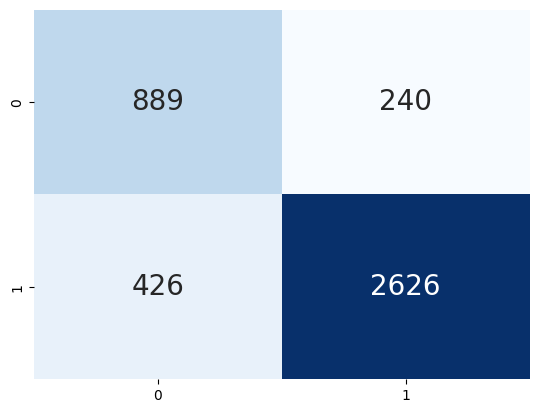

In [20]:
#RandomForest = RandomForestClassifier(n_estimators = 800)
#RandomForest.fit(X_train, y_train)
y_pred_rfc = bosque.predict(X_test)
evaluar(y_test, y_pred_rfc)

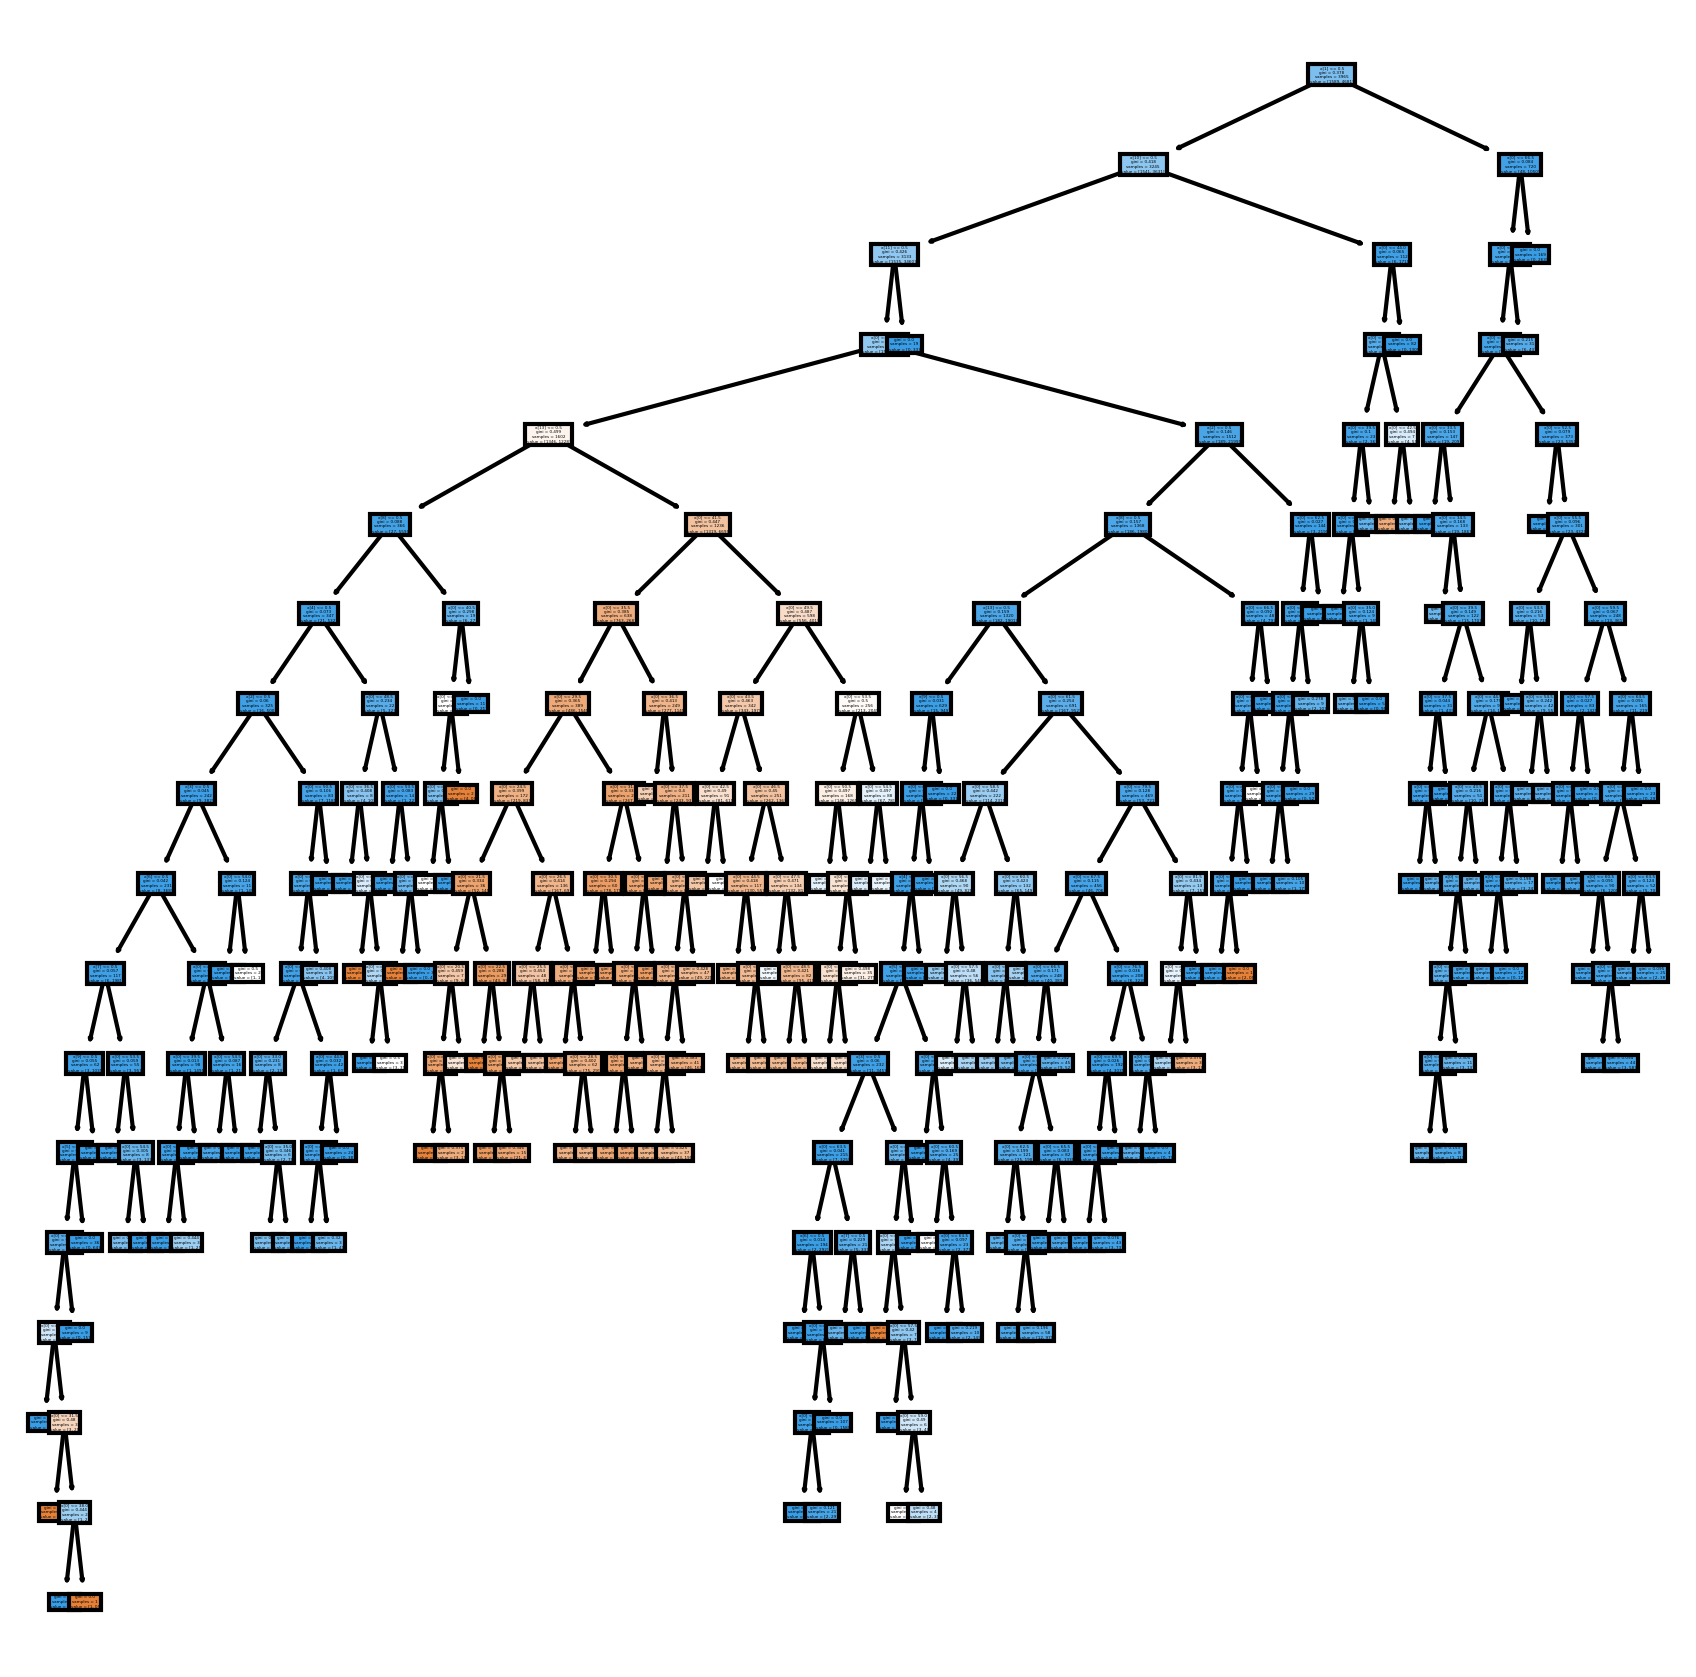

In [29]:
#Revisamos algún árbol en particular
numeroArbol = 8
arbolDelBosque = bosque.estimators_[numeroArbol]

plt.figure(figsize = (7,7), dpi = 300)
treeClassifier.plot_tree(arbolDelBosque,filled = True);
plt.show()